In [ ]:
!uv pip install openai hcaptcha_challenger --link-mode=copy

In [1]:
import base64
from pathlib import Path

import dotenv
from IPython.display import JSON, Image
from matplotlib import pyplot as plt

from hcaptcha_challenger import ChallengeTypeEnum
from hcaptcha_challenger.helper import FloatRect, create_coordinate_grid
from hcaptcha_challenger.helper.visualize_attention_points import show_answer_points

dotenv.load_dotenv()

True

In [2]:
from hcaptcha_challenger import ImageClassifier, SpatialPathReasoner, SpatialPointReasoner, AgentConfig

# Define the bounding box for coordinate alignment
DEFAULT_BBOX = FloatRect(x=0, y=0, width=501, height=431)

agent_config = AgentConfig(
    CHALLENGE_CLASSIFIER_MODEL="gemini-2.5-flash",
    SPATIAL_POINT_REASONER_MODEL="gemini-2.5-flash",
    SPATIAL_PATH_REASONER_MODEL="gemini-2.5-flash",
)

image_classifier = ImageClassifier(
    gemini_api_key=agent_config.GEMINI_API_KEY.get_secret_value(),
    model=agent_config.IMAGE_CLASSIFIER_MODEL,
)
spatial_path_reasoner = SpatialPathReasoner(
    gemini_api_key=agent_config.GEMINI_API_KEY.get_secret_value(),
    model=agent_config.SPATIAL_PATH_REASONER_MODEL,
)
spatial_point_reasoner = SpatialPointReasoner(
    gemini_api_key=agent_config.GEMINI_API_KEY.get_secret_value(),
    model=agent_config.SPATIAL_POINT_REASONER_MODEL,
)

## Utils

In [3]:
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")


def build_helper(input_image_path_: Path) -> Path:
    grid_divisions_path_ = input_image_path_.parent.joinpath(
        f"coordinate_grid_{input_image_path_.name}"
    )
    grid_divisions_image_ = create_coordinate_grid(input_image_path_, DEFAULT_BBOX)
    plt.imsave(str(grid_divisions_path_.resolve()), grid_divisions_image_)

    return grid_divisions_path_


## Image Classifier

In [4]:
image_label_binary_filepath = Path("assets/image_label_binary/20250817200551586876_0_challenge_view.png")

challenge_result_image_label_binary = await image_classifier(
    challenge_screenshot=image_label_binary_filepath,
)

JSON(challenge_result_image_label_binary.model_dump())

<IPython.core.display.JSON object>

[BoundingBoxCoordinate(box_2d=[1, 1]), BoundingBoxCoordinate(box_2d=[2, 2])]


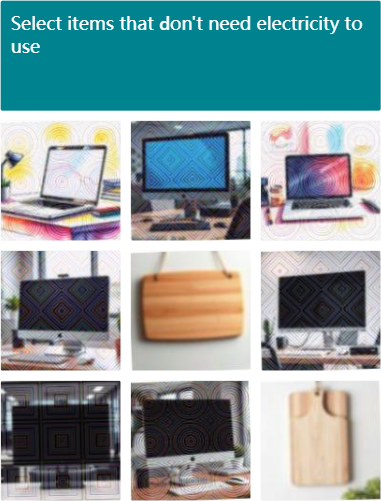

In [5]:
print(challenge_result_image_label_binary.coordinates)
Image(image_label_binary_filepath)

## Spatial Point Reasoning (`IMAGE_LABEL_SINGLE_SELECT`)

In [6]:
job_type = ChallengeTypeEnum.IMAGE_LABEL_SINGLE_SELECT
job_prompt = f"**JobType:** {job_type.value}\nIf you answer correctly, I will reward you with a tip of $20."

image_label_area_select_filepath_1 = Path("assets/image_label_area_select/20250426225911341786_0_challenge_view.png")

challenge_result_image_label_area_select_1 = await spatial_point_reasoner(
    challenge_screenshot=image_label_area_select_filepath_1,
    grid_divisions=build_helper(image_label_area_select_filepath_1),
)

JSON(challenge_result_image_label_area_select_1.model_dump())

<IPython.core.display.JSON object>

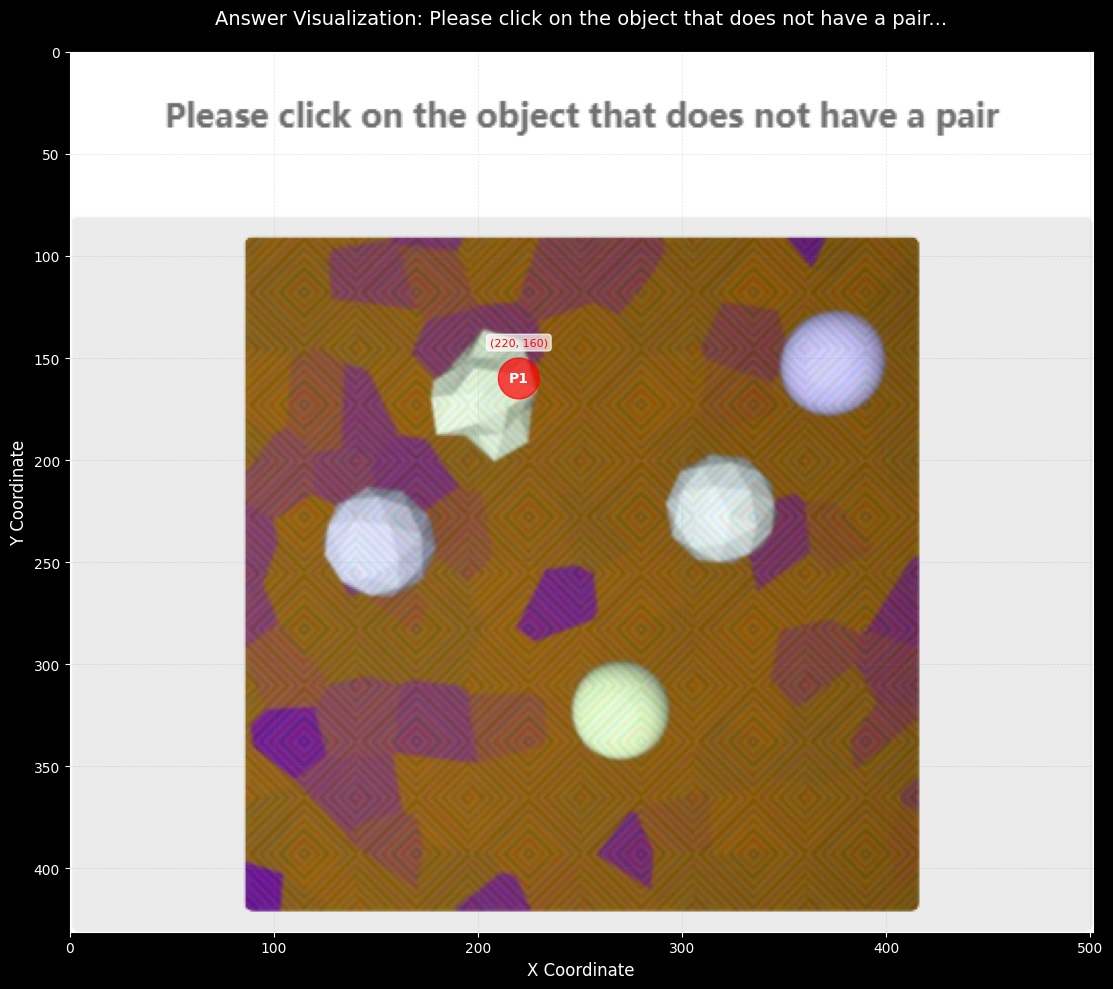

In [7]:
# Visualize the answer on the actual image
result = show_answer_points(
    image_label_area_select_filepath_1,
    challenge_result_image_label_area_select_1,
    DEFAULT_BBOX,
    show_plot=True,
)

## Spatial Point Reasoning (`IMAGE_LABEL_MULTI_SELECT_`)

In [8]:
job_type = ChallengeTypeEnum.IMAGE_LABEL_MULTI_SELECT
job_prompt = f"**JobType:** {job_type.value}"

image_label_area_select_filepath_2 = Path("assets/image_label_area_select/20250818003234074379_0_challenge_view.png")

challenge_result_image_label_area_select_2 = await spatial_point_reasoner(
    challenge_screenshot=image_label_area_select_filepath_2,
    grid_divisions=build_helper(image_label_area_select_filepath_2),
)

JSON(challenge_result_image_label_area_select_2.model_dump())

<IPython.core.display.JSON object>

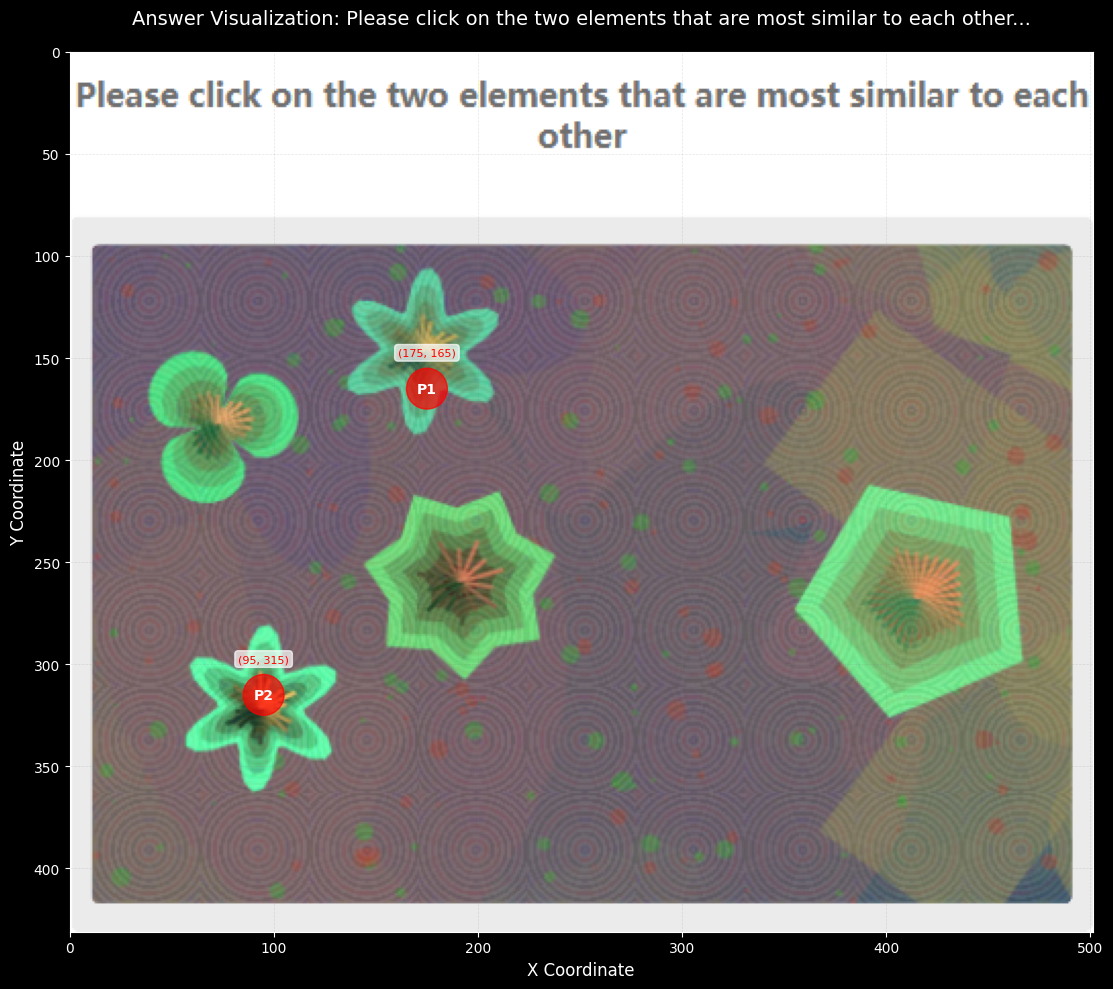

In [9]:
# Visualize the answer on the actual image
result_2 = show_answer_points(
    image_label_area_select_filepath_2,
    challenge_result_image_label_area_select_2,
    DEFAULT_BBOX,
    show_plot=True,
)

## Spatial Path Reasoning (`IMAGE_DRAG_SINGLE`)

In [10]:
job_type = ChallengeTypeEnum.IMAGE_DRAG_SINGLE
job_prompt = f"JobType: {job_type.value}"

image_drag_drop_single_single_filepath = Path("assets/image_drag_drop/20250717190455891095_0_challenge_view.png")

challenge_result_image_drag_drop_single = await spatial_path_reasoner(
    challenge_screenshot=image_drag_drop_single_single_filepath,
    grid_divisions=build_helper(image_drag_drop_single_single_filepath),
)

JSON(challenge_result_image_drag_drop_single.model_dump())

<IPython.core.display.JSON object>

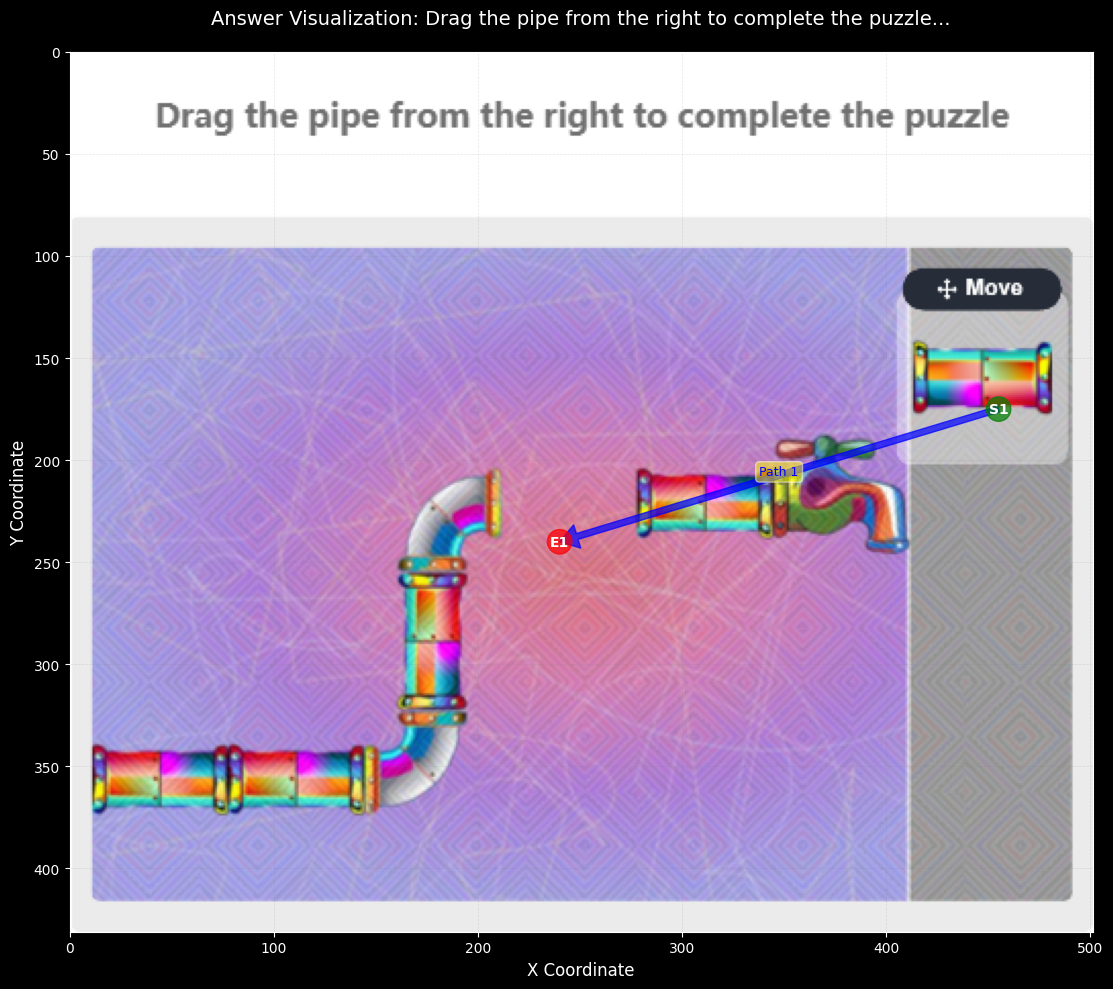

In [11]:
# Visualize the answer on the actual image
result = show_answer_points(
    image_drag_drop_single_single_filepath,
    challenge_result_image_drag_drop_single,
    DEFAULT_BBOX,
    show_plot=True,
    path_color='blue',
    arrow_width=3,
    alpha=0.7
)

## Spatial Path Reasoning (`IMAGE_DRAG_MULTI`)

In [12]:
job_type = ChallengeTypeEnum.IMAGE_DRAG_MULTI
job_prompt = "There are two pieces that need to be dragged"

image_drag_drop_single_multi_filepath = Path("assets/image_drag_drop/20250818003210373861_0_challenge_view.png")

challenge_result_image_drag_drop_multi = await spatial_path_reasoner(
    challenge_screenshot=image_drag_drop_single_multi_filepath,
    grid_divisions=build_helper(image_drag_drop_single_multi_filepath),
)

JSON(challenge_result_image_drag_drop_multi.model_dump())

<IPython.core.display.JSON object>

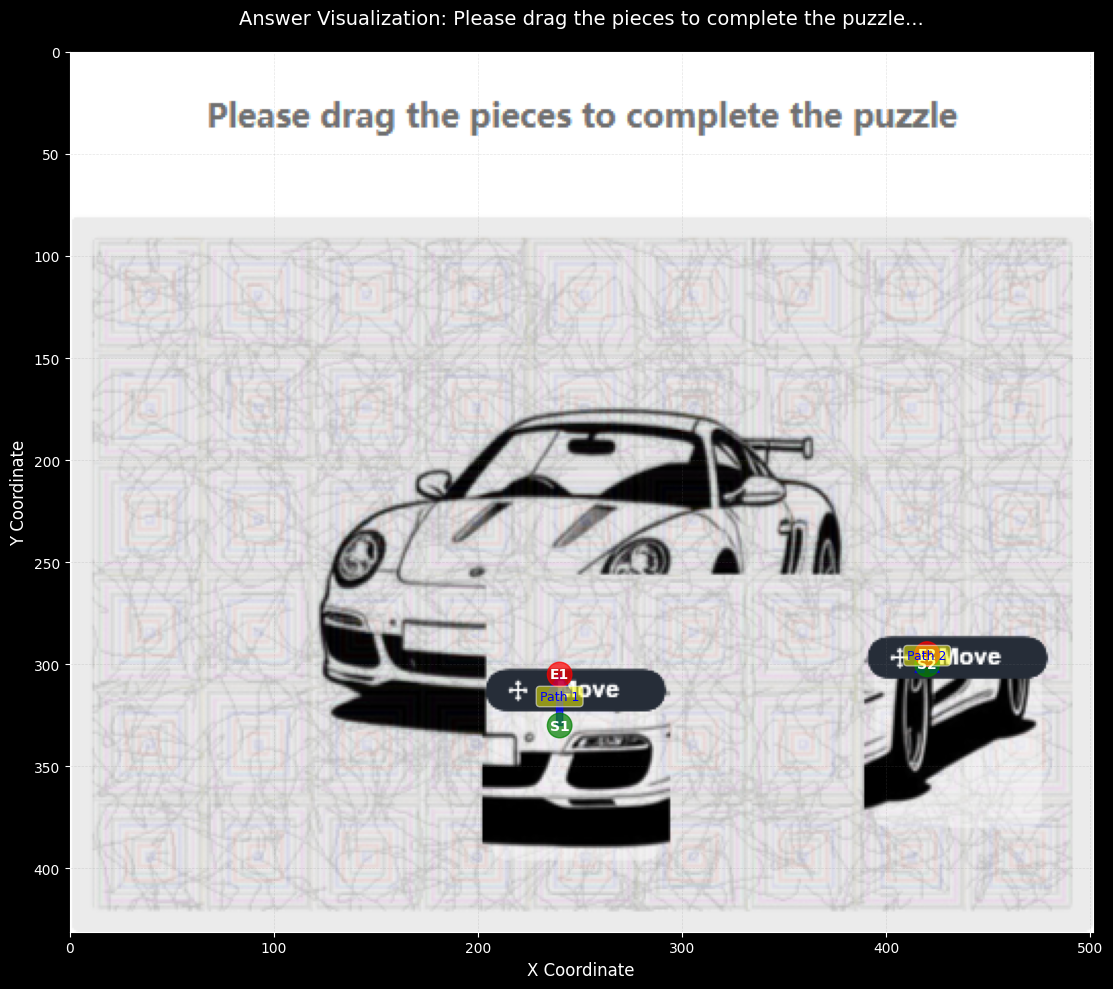

In [13]:
# Visualize the answer on the actual image
result = show_answer_points(
    image_drag_drop_single_multi_filepath,
    challenge_result_image_drag_drop_multi,
    DEFAULT_BBOX,
    show_plot=True,
    path_color='blue',
    arrow_width=3,
    alpha=0.7
)

## Spatial Path Reasoning (`IMAGE_DRAG_MULTI:CHALLENGE`)

In [14]:
job_type = ChallengeTypeEnum.IMAGE_DRAG_MULTI
job_prompt = f"JobType: {job_type.value}\n注意形状和缺口的吻合度"

image_drag_drop_single_multi_filepath_2 = Path("assets/image_drag_drop/single_9.png")

challenge_result_image_drag_drop_multi_2 = await spatial_path_reasoner(
    challenge_screenshot=image_drag_drop_single_multi_filepath_2,
    grid_divisions=build_helper(image_drag_drop_single_multi_filepath_2),
)

JSON(challenge_result_image_drag_drop_multi_2.model_dump())

<IPython.core.display.JSON object>

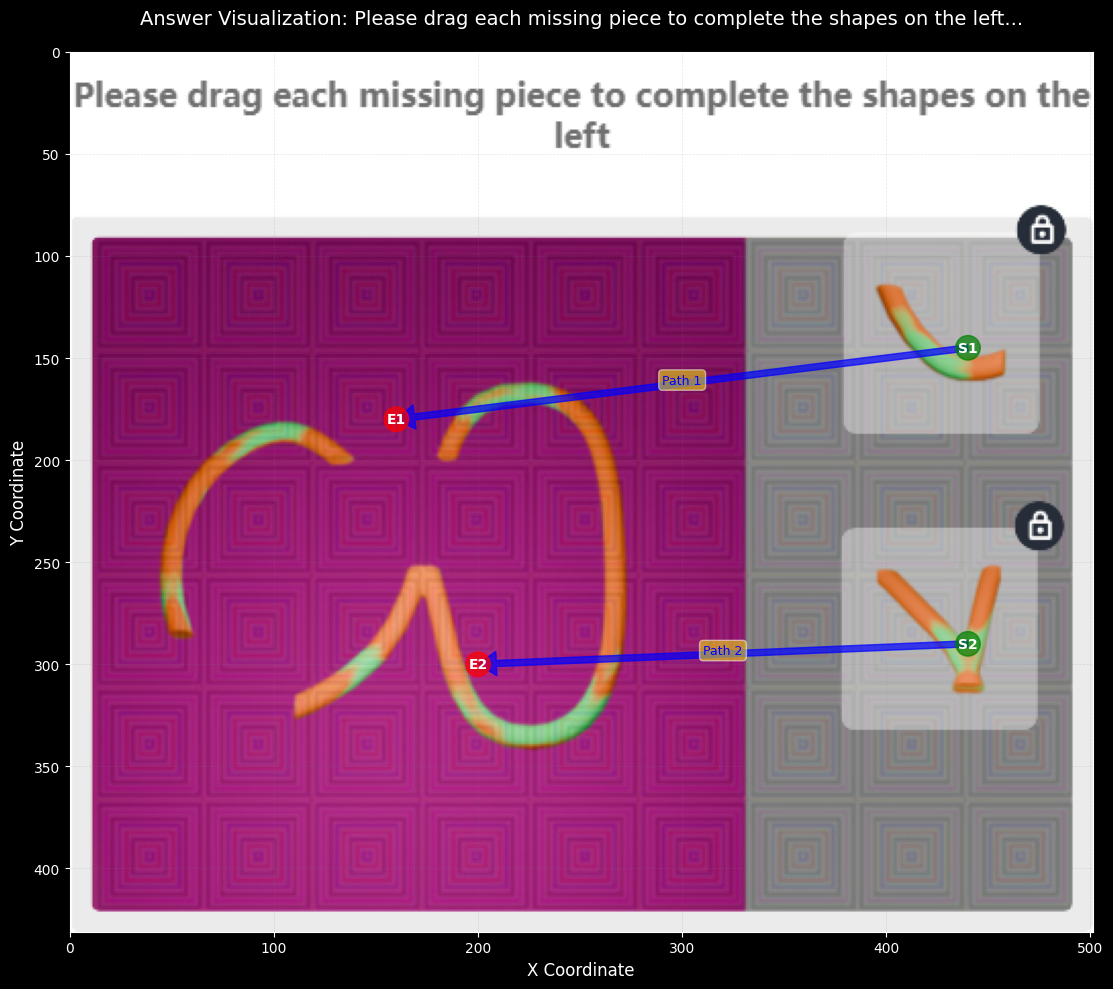

In [15]:
# Visualize the answer on the actual image
result = show_answer_points(
    image_drag_drop_single_multi_filepath_2,
    challenge_result_image_drag_drop_multi_2,
    DEFAULT_BBOX,
    show_plot=True,
    path_color='blue',
    arrow_width=3,
    alpha=0.7
)